In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [5]:
data= pd.read_csv("Real.csv")

In [7]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [9]:
data.shape

(414, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Feature Selection

In [14]:
data=data.drop(['X1 transaction date','No'],axis=1)

In [16]:
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [22]:
data['X4 number of convenience stores'] = data['X4 number of convenience stores'].astype('float')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    float64
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(6)
memory usage: 19.5 KB


In [26]:
data.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## Feature and Target Selection

In [30]:
X = data.drop('Y house price of unit area',axis=1)
y = data['Y house price of unit area']

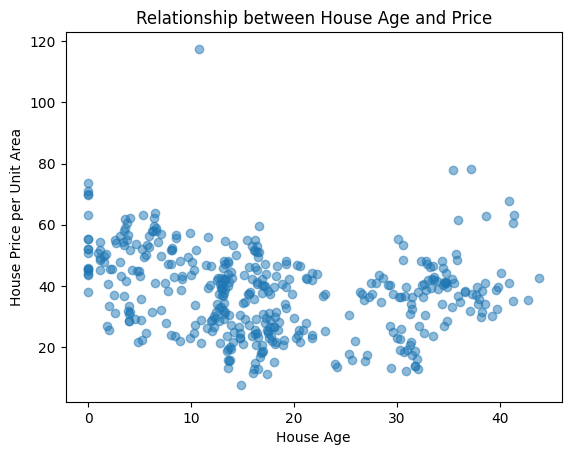

In [59]:
plt.scatter(data["X2 house age"], data["Y house price of unit area"], alpha=0.5)
plt.xlabel("House Age")
plt.ylabel("House Price per Unit Area")
plt.title("Relationship between House Age and Price")
plt.show()


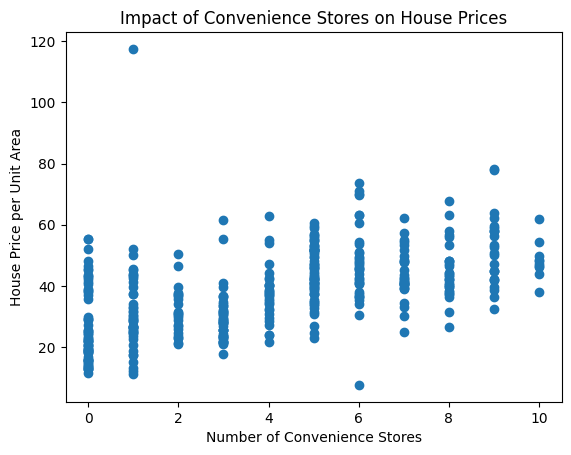

In [70]:
plt.scatter(data["X4 number of convenience stores"], data["Y house price of unit area"])
plt.xlabel("Number of Convenience Stores")
plt.ylabel("House Price per Unit Area")
plt.title("Impact of Convenience Stores on House Prices")
plt.show()


## Split train and test data

In [96]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [82]:
X_train.shape, X_test.shape

((331, 5), (83, 5))

In [84]:
#data_train = X_train
#data_train['House Price Unit'] = y_train
#data_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,House Price Unit
192,43.8,57.58945,7.0,24.96750,121.54069,42.7
234,8.0,2216.61200,4.0,24.96007,121.51361,23.9
5,7.1,2175.03000,3.0,24.96305,121.51254,32.1
45,36.6,488.81930,8.0,24.97015,121.54494,38.3
245,7.5,639.61980,5.0,24.97258,121.54814,40.8


In [86]:
#data_test = X_test
#data_test['House Price Unit'] = y_test
#data_test.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,House Price Unit
358,1.1,193.5845,6.0,24.96571,121.54089,45.1
350,13.2,492.2313,5.0,24.96515,121.53737,42.3
373,0.0,274.0144,1.0,24.97480,121.53059,52.2
399,12.7,170.1289,1.0,24.97371,121.52984,37.3
369,20.2,2185.1280,3.0,24.96322,121.51237,22.8


## Model Implementation

In [98]:
model = XGBRegressor()

In [100]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
prediction = model.predict(X_test)
prediction

array([51.493362, 38.92544 , 43.571667, 32.652134, 27.22281 , 36.808495,
       42.67042 , 54.433372, 17.660995, 58.325733, 22.211048, 30.940659,
       43.574596, 13.71224 , 34.85216 , 23.041965, 39.176144, 59.4895  ,
       24.985195, 34.34844 , 17.212652, 21.062008, 51.690865, 44.849464,
       15.624628, 33.497337, 19.429789, 43.571667, 55.044094, 32.433666,
       15.564944, 22.03559 , 35.616665, 26.40048 , 50.208508, 40.33631 ,
       52.978374, 15.752189, 35.18859 , 62.712982, 34.743614, 42.867   ,
       46.842945, 37.966885, 39.340008, 48.472942, 33.032345, 23.963966,
       47.6864  , 46.651833, 51.493362, 55.053013, 41.031834, 37.935852,
       39.77057 , 15.752189, 42.285336, 26.879978, 27.22281 , 54.433372,
       29.68514 , 29.289568, 15.752189, 15.13021 , 16.982986, 21.062008,
       24.285746, 39.924404, 35.04878 , 25.921638, 37.3964  , 54.513035,
       59.712147, 51.86305 , 31.350025, 42.53343 , 39.227814, 37.01464 ,
       35.413326, 39.763466, 38.93986 , 45.757893, 

In [104]:
model.score(X_test, y_test)

0.7275673176768294

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

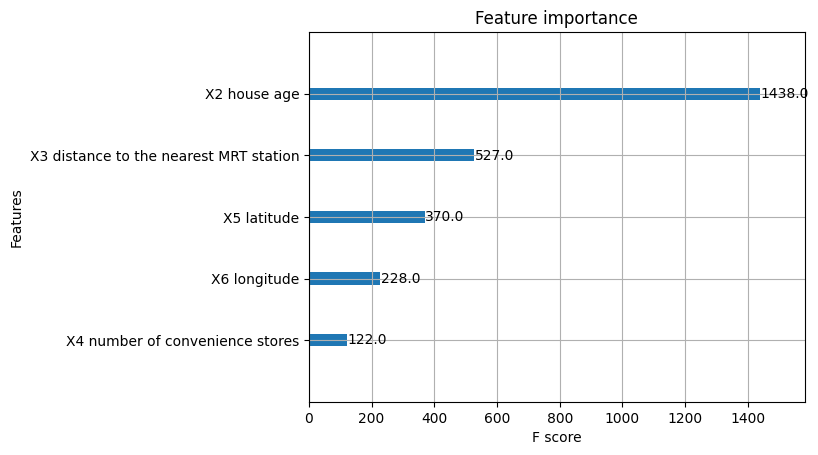

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(model, ax=plt.gca())

## Model Error

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
pred_train = model.predict(X_train)
print( r2_score(y_train, pred_train))

0.9905740133197255


In [117]:
print(mean_squared_error(y_test, prediction))

45.70323718550145
